In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
#load data in dataframe
data_train =pd.read_csv("./csv_files/credit score classification/train.csv")
data_test =pd.read_csv("./csv_files/credit score classification/test.csv")


C:\Users\Smriti\AppData\Local\Temp\ipykernel_9924\3432185909.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train =pd.read_csv("./csv_files/credit score classification/train.csv")


In [179]:
#copy the dataframe
train = data_train.copy()
test = data_test.copy()

In [180]:
train[:14]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [181]:
#checking null values
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [182]:
train.duplicated().sum()

0

In [183]:
#chevking the data type for each column
for col in train.columns:
    print(f'{col} : {pd.api.types.infer_dtype(train[col])}')

ID : string
Customer_ID : string
Month : string
Name : string
Age : string
SSN : string
Occupation : string
Annual_Income : string
Monthly_Inhand_Salary : floating
Num_Bank_Accounts : integer
Num_Credit_Card : integer
Interest_Rate : integer
Num_of_Loan : string
Type_of_Loan : string
Delay_from_due_date : integer
Num_of_Delayed_Payment : string
Changed_Credit_Limit : string
Num_Credit_Inquiries : floating
Credit_Mix : string
Outstanding_Debt : string
Credit_Utilization_Ratio : floating
Credit_History_Age : string
Payment_of_Min_Amount : string
Total_EMI_per_month : floating
Amount_invested_monthly : string
Payment_Behaviour : string
Monthly_Balance : mixed
Credit_Score : string


In [184]:
#here monthly balance is mixed
#dropping unnecessary columns
train.drop(['ID','Name','SSN','Month'],axis=1,inplace=True)

In [185]:
#dealing with wrong types
wrong_types = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
               'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [186]:
for col in wrong_types:
    if train[col][train[col] == '_'].any():
        print(col)

Changed_Credit_Limit


In [187]:
train.loc[train.Changed_Credit_Limit == '_','Changed_Credit_Limit'] = np.nan

In [188]:
for col in wrong_types:
    train[col] = train[col].str.replace('_','').astype('float64')

In [189]:
train.dtypes

Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

#### Separating Numerical and Categorical Columns

In [190]:
numerical = train.select_dtypes(include=['float64','int64']).columns
numerical

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [191]:
categorical = train.select_dtypes(include=['object']).columns
categorical

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [192]:
(train.Customer_ID.value_counts() != 8).any()

False

In [193]:
(train.Customer_ID.value_counts() == 8).sum()

12500

In [194]:
train.Age = train.groupby('Customer_ID').Age.transform(lambda x : x.mode()[0])
train.Annual_Income = train.groupby('Customer_ID').Annual_Income.transform(lambda x : x.mode()[0])
train.Occupation = train.groupby('Customer_ID').Occupation.transform(lambda x : x.mode()[0])

In [108]:
for col in numerical:    
    if train[col][train[col] < 0].any():
        print(col,len(train[col][train[col] < 0]))

Num_Bank_Accounts 21
Num_of_Loan 3876
Delay_from_due_date 591
Num_of_Delayed_Payment 644
Changed_Credit_Limit 1586
Monthly_Balance 9


In [109]:
train.Num_Bank_Accounts[train.Num_Bank_Accounts < 0].value_counts()

Num_Bank_Accounts
-1    21
Name: count, dtype: int64

In [110]:
train.drop(train[train.Num_Bank_Accounts < 0].index,inplace=True)

In [111]:
train.Num_of_Loan[train.Num_of_Loan<0].value_counts()

Num_of_Loan
-100.0    3875
Name: count, dtype: int64

In [112]:
train.drop(train[train.Num_of_Loan < 0].index,inplace=True)

In [113]:
train.reset_index(drop=True,inplace=True)

In [114]:
for col in numerical:    
    if train[col][train[col] < 0].any():
        print(col,len(train[col][train[col] < 0]))

Delay_from_due_date 559
Num_of_Delayed_Payment 616
Changed_Credit_Limit 1525
Monthly_Balance 9


In [115]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,96104.000000,96104.000000,81685.000000,96104.000000,96104.000000,96104.000000,96104.000000,96104.000000,89405.000000,94092.000000,94216.000000,96104.000000,96104.000000,96104.000000,91796.000000,9.334300e+04
mean,33.270707,50506.790217,4194.711239,17.096541,22.527606,72.354460,7.164832,21.072650,31.134489,10.394152,27.743090,1427.106101,32.288118,1409.238408,636.061659,-3.213953e+22
std,10.765046,38317.243974,3185.309650,117.309614,129.298964,466.483097,60.321139,14.861229,227.266979,6.795080,192.969963,1155.957167,5.114835,8324.403859,2040.035325,3.272959e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1625.188333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.022500,28.060916,30.305498,74.549548,2.698778e+02
50%,33.000000,36993.940000,3091.386667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.640000,32.307331,69.246684,135.821176,3.364020e+02
75%,42.000000,71681.400000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.890000,9.000000,1948.980000,36.500450,161.340704,265.579429,4.694649e+02
max,56.000000,179987.280000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [116]:
train.Num_Bank_Accounts[train.Num_Bank_Accounts > 50].value_counts()

Num_Bank_Accounts
803     7
791     5
1668    5
105     5
1257    4
       ..
887     1
211     1
385     1
1221    1
697     1
Name: count, Length: 887, dtype: int64

In [117]:
train.drop(train[train.Num_Bank_Accounts > 50].index,inplace=True)

In [118]:
train.Num_Credit_Card[train.Num_Credit_Card > 50].value_counts()

Num_Credit_Card
849     8
852     7
218     6
183     6
106     6
       ..
1140    1
290     1
414     1
892     1
679     1
Name: count, Length: 1119, dtype: int64

In [119]:
train.drop(train[train.Num_Credit_Card > 50].index,inplace=True)

In [120]:
train.reset_index(drop=True,inplace=True)

In [121]:
train.isnull().sum() 

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13894
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment       6468
Changed_Credit_Limit         1949
Num_Credit_Inquiries         1809
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4151
Payment_Behaviour               0
Monthly_Balance              2659
Credit_Score                    0
dtype: int64

### Filling Numerical Columns Null

In [122]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [123]:
null_num_cols = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
imputer = SimpleImputer(strategy='mean')
imputed_numerical = pd.DataFrame(imputer.fit_transform(train[null_num_cols]),columns=null_num_cols)
imputed_numerical.isnull().sum()

Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [124]:
train[null_num_cols] = imputed_numerical

In [125]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

### Dealing with wrong values in categorical column

In [126]:
train.Occupation.value_counts()

Occupation
Lawyer           6566
Engineer         6329
Mechanic         6320
Architect        6303
Scientist        6277
Accountant       6224
Developer        6222
Teacher          6215
Media_Manager    6193
Entrepreneur     6165
Journalist       6086
Doctor           6070
Manager          5965
Musician         5923
Writer           5895
_______             8
Name: count, dtype: int64

In [127]:
train.loc[train.Occupation == '_______','Occupation'] = np.nan

In [128]:
train.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                               1296
Credit-Builder Loan                                                                                         1165
Personal Loan                                                                                               1163
Student Loan                                                                                                1160
Debt Consolidation Loan                                                                                     1157
                                                                                                            ... 
Home Equity Loan, Debt Consolidation Loan, Personal Loan, Not Specified, and Mortgage Loan                     4
Auto Loan, Credit-Builder Loan, Payday Loan, Personal Loan, and Student Loan                                   4
Not Specified, Payday Loan, Payday Loan, and Credit-Builder Loan                   

In [129]:
train.Type_of_Loan[train.Type_of_Loan == '_'].any()

False

In [130]:
train.Credit_Mix.value_counts()

Credit_Mix
Standard    33803
Good        22541
_           18767
Bad         17650
Name: count, dtype: int64

In [131]:
train.loc[train.Credit_Mix == '_', 'Credit_Mix'] = np.nan

<Axes: xlabel='count', ylabel='Credit_Mix'>

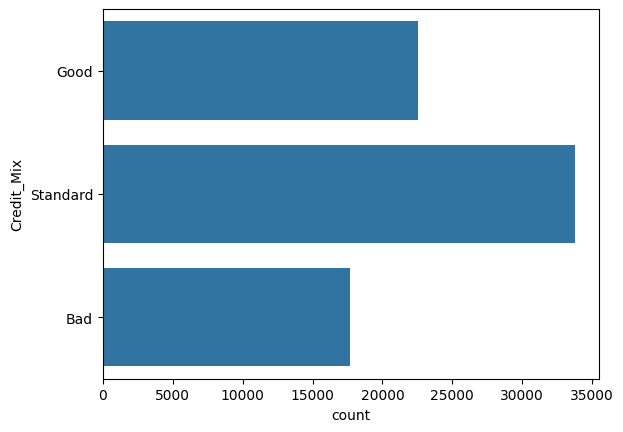

In [132]:
sns.countplot(train.Credit_Mix)

In [133]:
train.Credit_History_Age.value_counts()

Credit_History_Age
19 Years and 4 Months     415
15 Years and 11 Months    415
17 Years and 9 Months     415
19 Years and 5 Months     413
15 Years and 9 Months     410
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       13
33 Years and 7 Months      12
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [134]:
train.Credit_History_Age[train.Credit_History_Age == '_'].any()

False

In [135]:
train.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    48570
No     33071
NM     11120
Name: count, dtype: int64

In [136]:
train.loc[train.Payment_of_Min_Amount == 'NM','Payment_of_Min_Amount'] = np.nan

<Axes: xlabel='count', ylabel='Payment_of_Min_Amount'>

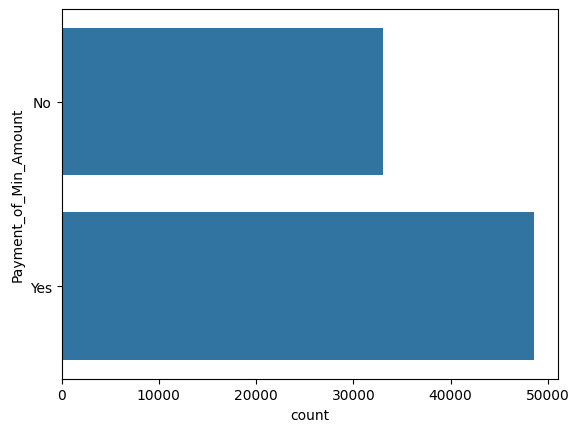

In [137]:
sns.countplot(train.Payment_of_Min_Amount)

In [138]:
train.Payment_Behaviour.value_counts()  

Payment_Behaviour
Low_spent_Small_value_payments      23630
High_spent_Medium_value_payments    16268
Low_spent_Medium_value_payments     12878
High_spent_Large_value_payments     12697
High_spent_Small_value_payments     10534
Low_spent_Large_value_payments       9717
!@9#%8                               7037
Name: count, dtype: int64

In [139]:
train.loc[train.Payment_Behaviour == '!@9#%8','Payment_Behaviour'] = np.nan

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

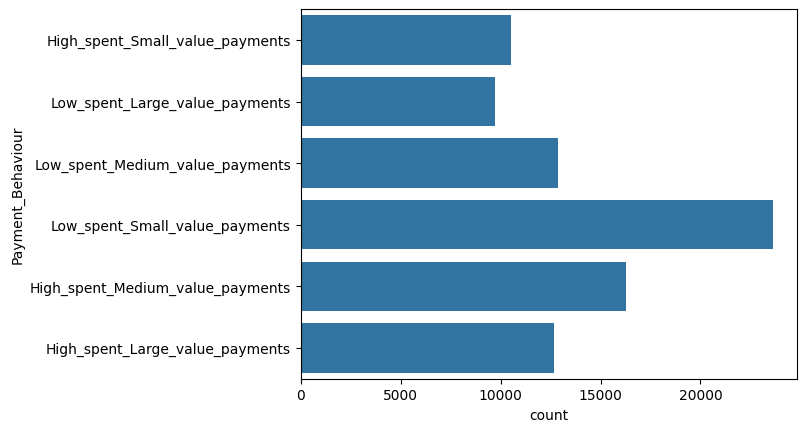

In [140]:
sns.countplot(train.Payment_Behaviour)

In [141]:
train.Credit_Score.value_counts()

Credit_Score
Standard    49370
Poor        26925
Good        16466
Name: count, dtype: int64

In [142]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      8
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10574
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  18767
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8418
Payment_of_Min_Amount       11120
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7037
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [143]:
#dropping customer_id
train.drop(['Customer_ID'],axis=1,inplace=True)

In [144]:
categorical = categorical.drop('Customer_ID')
categorical = categorical.drop('Credit_Score')

In [145]:
categorical

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [146]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(imputer.fit_transform(train[categorical]),columns=categorical)

In [147]:
train[categorical] = imputed_categorical

In [148]:
train.isnull().sum().any()

False

In [149]:
train.shape

(92761, 23)

In [195]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    train = train[train[column] >= 0]

In [176]:
# Scaling
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

### Checking Correalation to Help dropping columns

<Axes: >

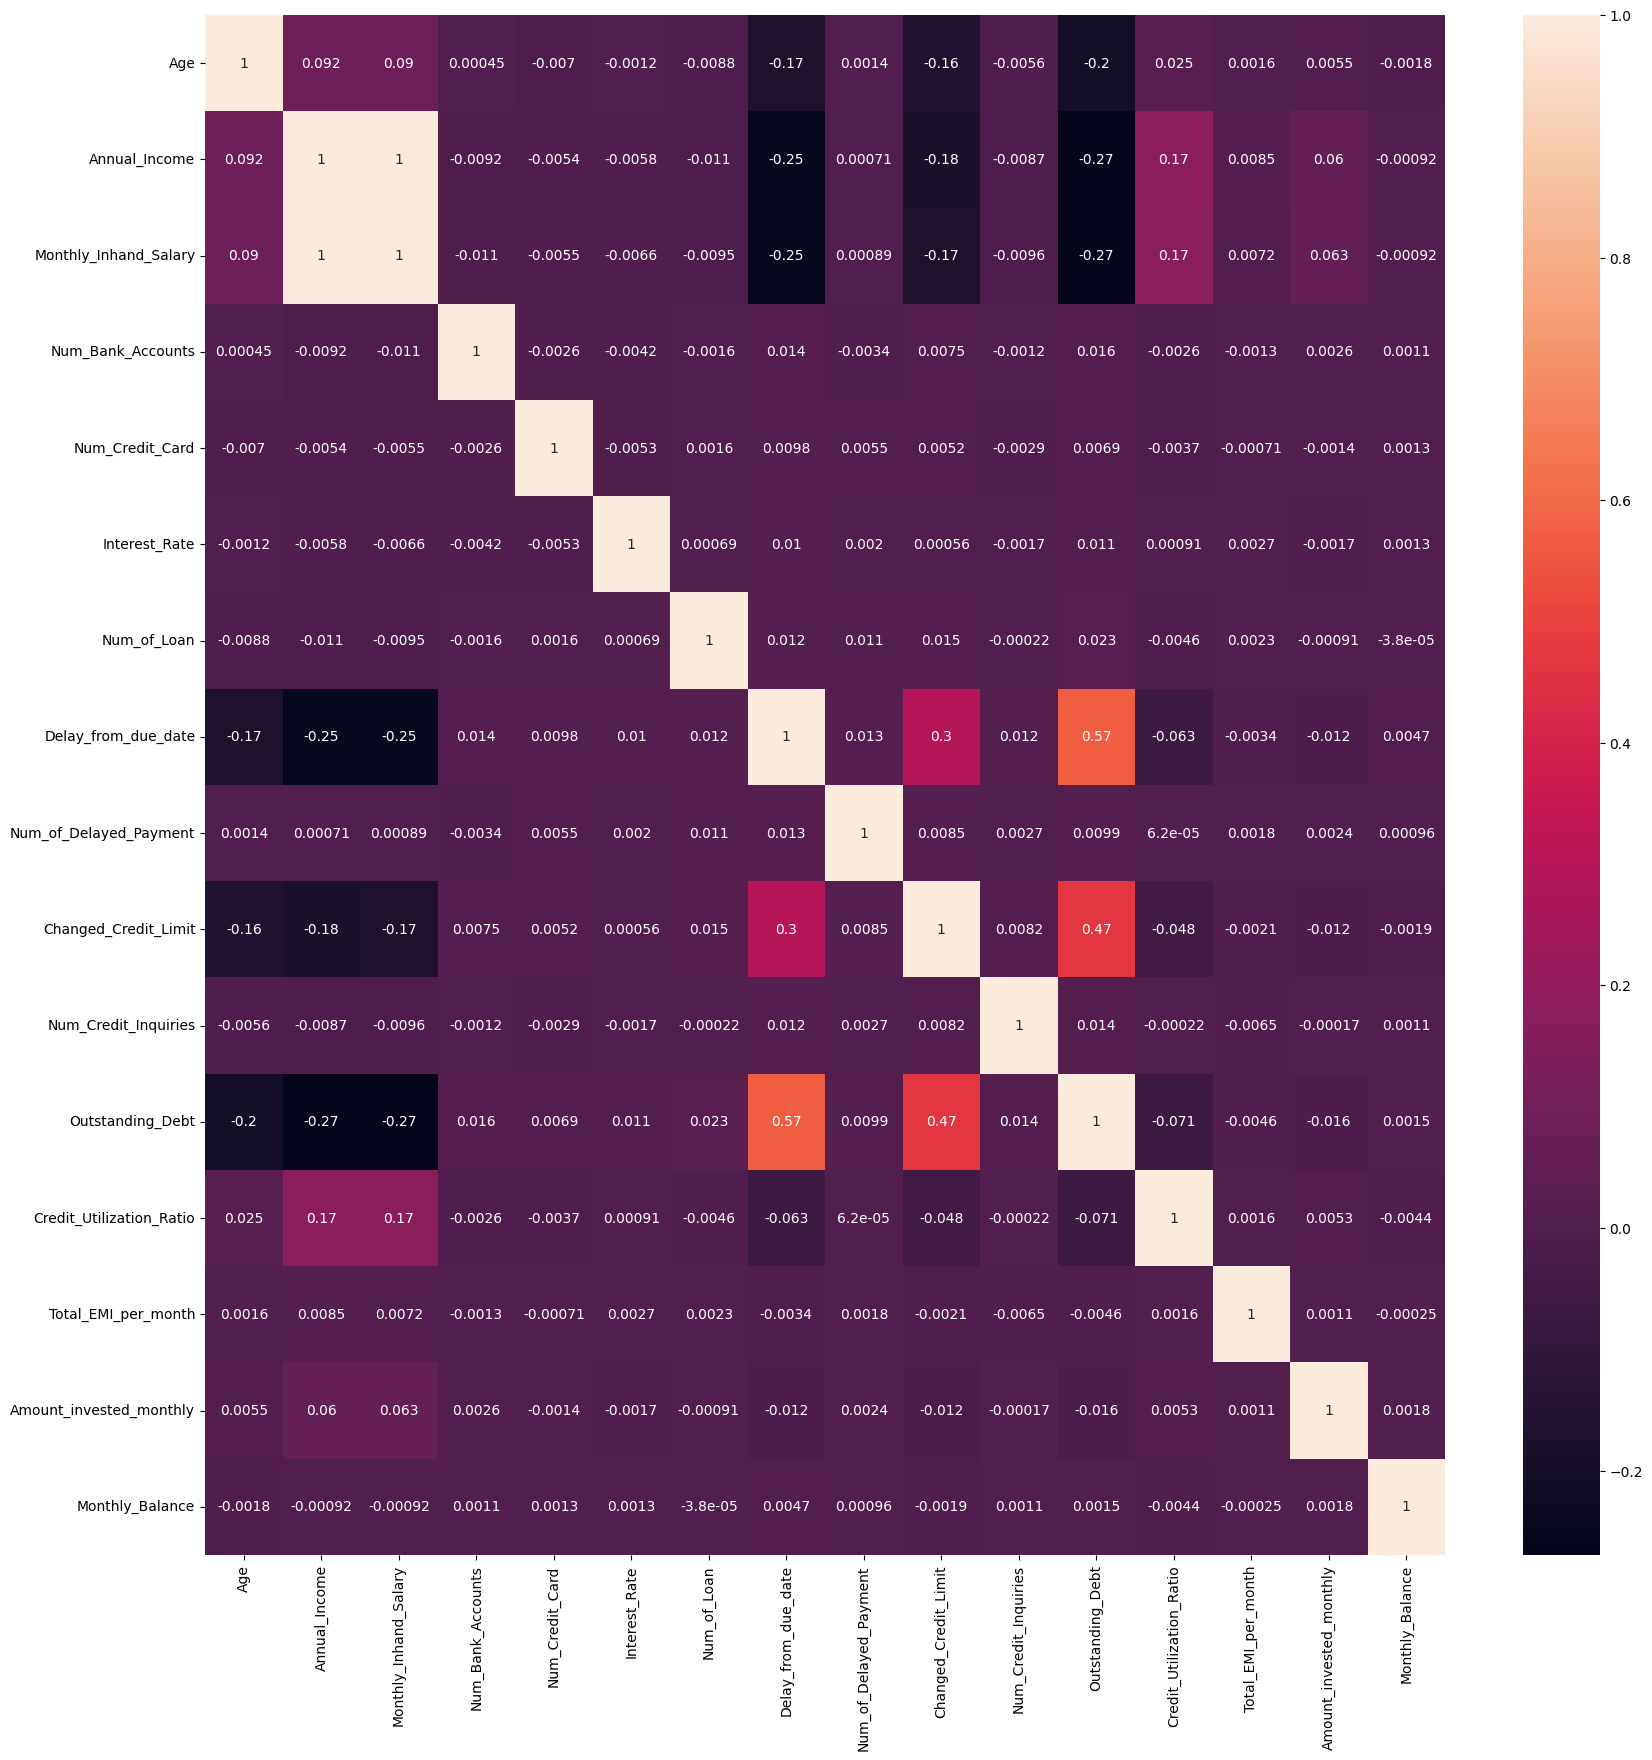

In [196]:
plt.figure(figsize=(20,20))
sns.heatmap(train[numerical].corr(),annot=True)

<Axes: >

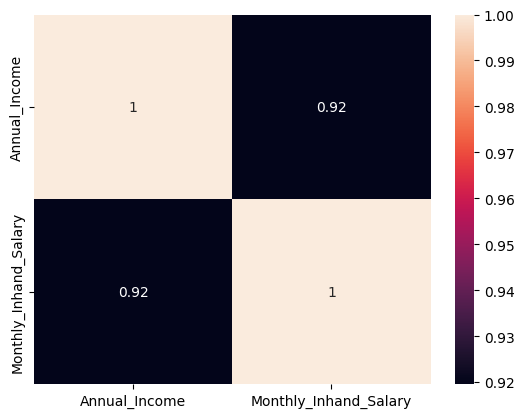

In [151]:
sns.heatmap(train[['Annual_Income','Monthly_Inhand_Salary']].corr(),annot=True)

In [152]:
train.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)

In [153]:
numerical = numerical.drop('Monthly_Inhand_Salary')
numerical

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

### Scaling and Encoding the Features

In [199]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,95739.0,3.321295e+01,1.075068e+01,1.400000e+01,24.000000,33.000000,42.000000,56.000000
Annual_Income,95739.0,5.023685e+04,3.812406e+04,7.005930e+03,19267.270000,36898.490000,71424.570000,179987.280000
Monthly_Inhand_Salary,81379.0,4.171736e+03,3.170199e+03,3.036454e+02,1619.936667,3080.005833,5921.000000,15204.633333
Num_Bank_Accounts,95739.0,1.715042e+01,1.173290e+02,0.000000e+00,4.000000,6.000000,8.000000,1798.000000
Num_Credit_Card,95739.0,2.254361e+01,1.291934e+02,0.000000e+00,4.000000,6.000000,7.000000,1499.000000
Interest_Rate,95739.0,7.235386e+01,4.662915e+02,1.000000e+00,8.000000,14.000000,20.000000,5797.000000
Num_of_Loan,95739.0,3.045436e+00,6.278541e+01,-1.000000e+02,1.000000,3.000000,5.000000,1496.000000
Delay_from_due_date,95739.0,2.126136e+01,1.479458e+01,0.000000e+00,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,89017.0,3.083560e+01,2.244593e+02,-3.000000e+00,9.000000,14.000000,18.000000,4397.000000
Changed_Credit_Limit,95739.0,1.062442e+01,6.646052e+00,0.000000e+00,5.590000,9.540000,15.035000,36.970000


In [155]:
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

In [200]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,95739.0,3.321295e+01,1.075068e+01,1.400000e+01,24.000000,33.000000,42.000000,56.000000
Annual_Income,95739.0,5.023685e+04,3.812406e+04,7.005930e+03,19267.270000,36898.490000,71424.570000,179987.280000
Monthly_Inhand_Salary,81379.0,4.171736e+03,3.170199e+03,3.036454e+02,1619.936667,3080.005833,5921.000000,15204.633333
Num_Bank_Accounts,95739.0,1.715042e+01,1.173290e+02,0.000000e+00,4.000000,6.000000,8.000000,1798.000000
Num_Credit_Card,95739.0,2.254361e+01,1.291934e+02,0.000000e+00,4.000000,6.000000,7.000000,1499.000000
Interest_Rate,95739.0,7.235386e+01,4.662915e+02,1.000000e+00,8.000000,14.000000,20.000000,5797.000000
Num_of_Loan,95739.0,3.045436e+00,6.278541e+01,-1.000000e+02,1.000000,3.000000,5.000000,1496.000000
Delay_from_due_date,95739.0,2.126136e+01,1.479458e+01,0.000000e+00,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,89017.0,3.083560e+01,2.244593e+02,-3.000000e+00,9.000000,14.000000,18.000000,4397.000000
Changed_Credit_Limit,95739.0,1.062442e+01,6.646052e+00,0.000000e+00,5.590000,9.540000,15.035000,36.970000


In [201]:
train[numerical] = StandardScaler().fit_transform(train[numerical])

In [202]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,9.573900e+04,9.573900e+04,8.137900e+04,9.573900e+04,9.573900e+04,9.573900e+04,9.573900e+04,9.573900e+04,8.901700e+04,9.573900e+04,9.387200e+04,9.573900e+04,9.573900e+04,9.573900e+04,9.146100e+04,9.298800e+04
mean,1.024190e-16,-2.333371e-16,-3.492512e-19,-1.068720e-17,-2.285873e-17,-2.374933e-18,1.350743e-17,-6.887305e-17,6.385681e-18,-3.126005e-16,-4.390178e-18,-2.021661e-16,-1.543706e-17,2.152283e-17,-8.701062e-18,3.973440e-18
std,1.000005e+00,1.000005e+00,1.000006e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000006e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.787148e+00,-1.133960e+00,-1.220149e+00,-1.461745e-01,-1.744960e-01,-1.530249e-01,-1.641241e+00,-1.437112e+00,-1.507435e-01,-1.598615e+00,-1.435698e-01,-1.237928e+00,-2.400269e+00,-1.693665e-01,-3.115672e-01,-1.016415e+02
25%,-8.569694e-01,-8.123413e-01,-8.049385e-01,-1.120821e-01,-1.435345e-01,-1.380128e-01,-3.257838e-02,-7.611852e-01,-9.728145e-02,-7.575098e-01,-1.279783e-01,-7.462491e-01,-8.273055e-01,-1.657013e-01,-2.752767e-01,9.838498e-03
50%,-1.980853e-02,-3.498692e-01,-3.443750e-01,-9.503596e-02,-1.280537e-01,-1.251452e-01,-7.236756e-04,-2.204438e-01,-7.500557e-02,-1.631688e-01,-1.123868e-01,-2.269119e-01,3.778686e-03,-1.610310e-01,-2.454266e-01,9.838498e-03
75%,8.173523e-01,5.557600e-01,5.517868e-01,-7.798979e-02,-1.203134e-01,-1.122777e-01,3.113103e-02,4.554829e-01,-5.718487e-02,6.636421e-01,-9.679528e-02,4.565224e-01,8.237605e-01,-1.499631e-01,-1.822781e-01,9.838498e-03
max,2.119603e+00,3.403392e+00,3.480212e+00,1.517833e+01,1.142832e+01,1.227703e+01,2.377881e+01,3.091597e+00,1.945203e+01,3.964115e+00,1.335349e+01,3.071064e+00,3.466581e+00,9.728081e+00,4.579943e+00,9.838498e-03


In [159]:
for col in categorical:
    train[col] = LabelEncoder().fit_transform(train[col])

In [160]:
train[categorical]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,127,2,180,0,2
1,12,127,1,86,0,3
2,12,127,1,184,0,4
3,12,127,1,185,0,5
4,12,127,1,186,0,1
...,...,...,...,...,...,...
92755,9,672,2,306,0,1
92756,9,672,2,307,0,0
92757,9,672,2,308,0,1
92759,9,672,1,310,0,3


In [161]:
X = train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [162]:
y.value_counts()

Credit_Score
Standard    45305
Poor        24849
Good        14516
Name: count, dtype: int64

<Axes: xlabel='Credit_Score', ylabel='Count'>

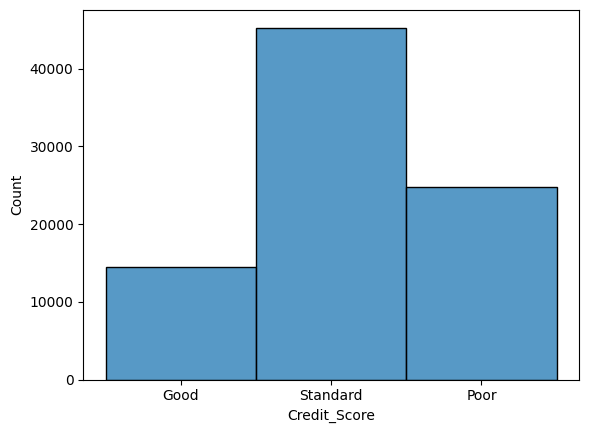

In [163]:
sns.histplot(y)

In [164]:
y = y.map({'Poor':0,'Good':1,'Standard':2})

### Adding New Features

In [206]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)

train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Calculate the total outstanding debt per account

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Calculate the total number of delayed payments per account

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments) 

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']

In [207]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((67736, 21), (16934, 21))

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
logistic_classifier = LogisticRegression(C=0.2)
logistic_classifier.fit(x_train, y_train)


c:\Users\Smriti\.conda\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.2)

[[2698  141 2065]
 [  67  618 2242]
 [1659  414 7030]]
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      4904
           1       0.53      0.21      0.30      2927
           2       0.62      0.77      0.69      9103

    accuracy                           0.61     16934
   macro avg       0.59      0.51      0.52     16934
weighted avg       0.60      0.61      0.59     16934



<Axes: >

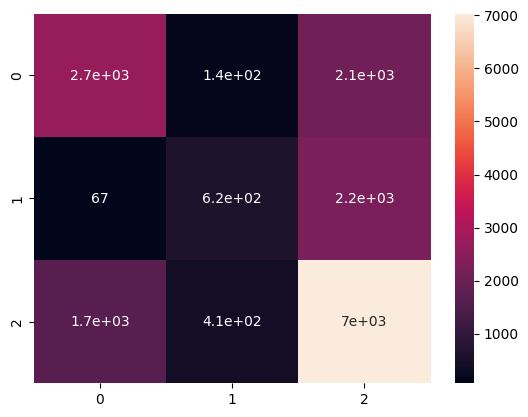

In [210]:
y_pred = logistic_classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(classification_report(y_test,y_pred))

sns.heatmap(conf_matrix, annot=True)

In [211]:
from sklearn.metrics import accuracy_score
print('Accuracy score', accuracy_score(y_test, y_pred))

Accuracy score 0.6109601984173851


In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1234)

In [214]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7981575528522499


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84670 entries, 0 to 92760
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       84670 non-null  float64
 1   Occupation                84670 non-null  int32  
 2   Annual_Income             84670 non-null  float64
 3   Num_Bank_Accounts         84670 non-null  float64
 4   Num_Credit_Card           84670 non-null  float64
 5   Interest_Rate             84670 non-null  float64
 6   Num_of_Loan               84670 non-null  float64
 7   Type_of_Loan              84670 non-null  int32  
 8   Delay_from_due_date       84670 non-null  float64
 9   Num_of_Delayed_Payment    84670 non-null  float64
 10  Changed_Credit_Limit      84670 non-null  float64
 11  Num_Credit_Inquiries      84670 non-null  float64
 12  Credit_Mix                84670 non-null  int32  
 13  Outstanding_Debt          84670 non-null  float64
 14  Credit_Util

In [174]:
train['Occupation'].unique

<bound method Series.unique of 0        12
1        12
2        12
3        12
4        12
         ..
92755     9
92756     9
92757     9
92759     9
92760     9
Name: Occupation, Length: 84670, dtype: int32>